In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
x,y, = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

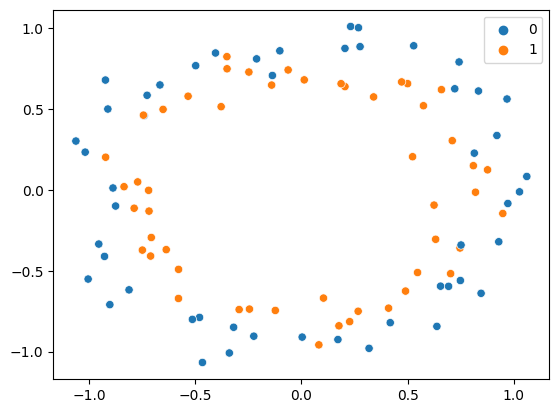

In [4]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [6]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, verbose=0)

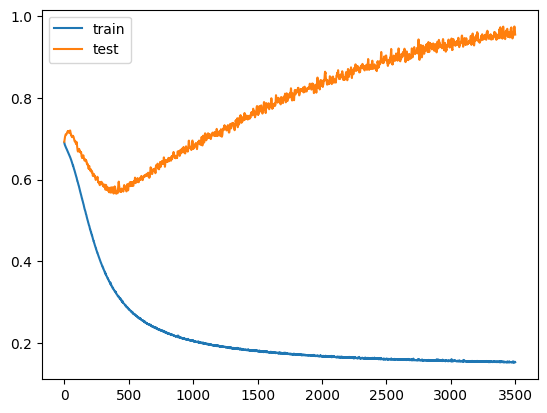

In [10]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 12s 1ms/step


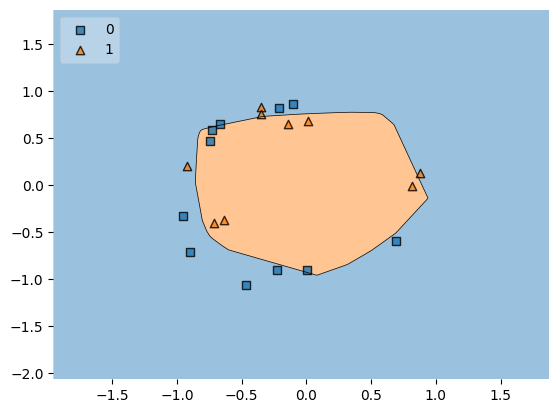

In [11]:
plot_decision_regions(x_test,y_test.ravel(),clf=model,legend=2)
plt.show()

# Early Stopping

In [12]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [17]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 2s 179ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 31ms/step - loss: 0.6912 - accuracy: 0.5125 - val_loss: 0.6952 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 43ms/step - loss: 0.6900 - accuracy: 0.5375 - val_loss: 0.6972 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 25ms/step - loss: 0.6884 - accuracy: 0.5250 - val_loss: 0.6992 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 31ms/step - loss: 0.6869 - accuracy: 0.5250 - val_loss: 0.7012 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 32ms/step - loss: 0.6862 - accuracy: 0.5500 - val_loss: 0.7038 - val_accuracy: 0.4500
Epoch 7/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6851 - accuracy: 0.5375 - val_loss: 0.7063 - val_accuracy: 0.4500
Epoch 8/3500

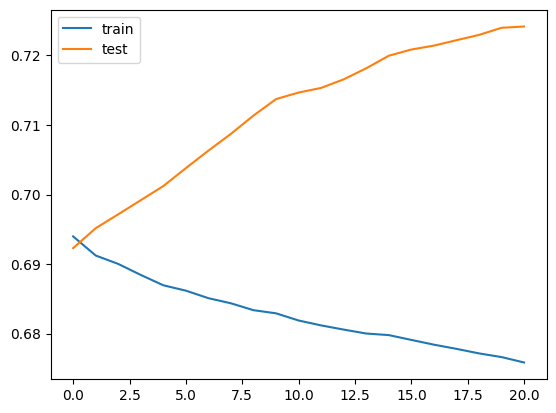

In [18]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()